Author: Lynn Menchaca

Date: 12Dec2022

Project: Houston Weather Prediction

The purpose of this project is to gain exposure to unbalanced data. Two separate sets of models will be used with this data set. One for binary classification predicting if it will rain (feature rain_today). The second will be for regression predicting how much it will rain (feature rainfall).

Resources:

- Kaggle Data Set: Houston Weather Data
    - https://www.kaggle.com/datasets/alejandrochapa/houston-weather-data
- Kaggle Data Set: Houston Weather - 2020 - 21 - Rain Hours Prediction
    - https://www.kaggle.com/datasets/praxisart/houston-weather-202021-rain-hours-prediction
    
- https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
- Imputing Missing Data with Simple and Advanced Techniques by Idil Ismiguzel
    - https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87
- Guidelines for Removing and Handling Outliers in Data by Jim Frost
    - https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20increase%20the%20variability%20in,results%20to%20become%20statistically%20significant
- 7 Techniques to Handle Imbalanced Data by Ye Wu & Rick Radewagen
    - https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

### Project Overview

### Exploratory Data Analysis
- Initial Overview: size, collumns, data types, missing values
- Convert the number imported as object data in to numeric data.
- Handel Missing Data
- Visually explore data
- Treate the Outliers
- Convert Categorical to Numerical

### Feature Engineering and Machine Learning Models:
- Handel Imblanance data set
- Feature Selection
- Train Test Split
- Scaling/Transformation and Fit
- ML Models

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Frames

data_file_path = '/Users/lynnpowell/Documents/DS_Projects/Data_Files/Houston_Weather_Data/'

#The Houston weather data covers years from 2010 to 2021
#appending each year of weather data to create one large data file

weather_files = []

for year in range(2010, 2022):
    data_file = data_file_path+'htx_'+str(year)+'_weather.csv'
    
    try:
        df = pd.read_csv(data_file, index_col=None, header=0)
    except OSError:
        print(str(year), " year has no data")
        continue
    weather_files.append(df)
    
df_weather = pd.concat(weather_files, ignore_index=True)
df_weather.head(10)

2016  year has no data
2017  year has no data
2020  year has no data


,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow
0,2010-01-01,43.0,55.0,0.0,15.0,15.0,76.0,40.0,30.4,30.31,Cloudy,Fair,43.0,55.0,No,No
1,2010-01-02,35.0,53.0,0.0,5.0,7.0,76.0,28.0,30.35,30.24,Mostly Cloudy,Mostly Cloudy,44.0,52.0,No,No
2,2010-01-03,43.0,48.0,0.0,14.0,9.0,71.0,68.0,30.21,30.17,Cloudy,Cloudy,43.0,48.0,No,No
3,2010-01-04,36.0,48.0,0.0,15.0,14.0,70.0,42.0,30.37,30.35,Cloudy,Fair,41.0,48.0,No,No
4,2010-01-05,30.0,49.0,0.0,9.0,5.0,61.0,37.0,30.47,30.34,Fair,Partly Cloudy,35.0,48.0,No,No
5,2010-01-06,32.0,57.0,0.0,7.0,12.0,79.0,64.0,30.25,30.09,Cloudy,Cloudy,44.0,57.0,No,Yes
6,2010-01-07,31.0,58.0,0.1,29.0,26.0,83.0,62.0,30.11,30.22,Cloudy / Windy,Cloudy / Windy,50.0,39.0,Yes,No
7,2010-01-08,26.0,33.0,0.0,15.0,18.0,45.0,40.0,30.52,30.45,Cloudy,Cloudy,27.0,33.0,No,No
8,2010-01-09,22.0,42.0,0.0,9.0,6.0,56.0,27.0,30.55,30.44,Fair,Fair,27.0,41.0,No,No
9,2010-01-10,27.0,43.0,0.0,9.0,0.0,67.0,35.0,30.65,30.57,Fair,Fair,31.0,43.0,No,No


In [3]:
#size of data frame and type of data for each feature
print('data size: ', df_weather.shape)
print(df_weather.info())

data size:  (3286, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3286 non-null   object 
 1   min_temp       3286 non-null   float64
 2   max_temp       3286 non-null   float64
 3   rainfall       3286 non-null   float64
 4   wind_speed9am  3286 non-null   object 
 5   wind_speed3pm  3286 non-null   object 
 6   humidity9am    3286 non-null   object 
 7   humidity3pm    3286 non-null   object 
 8   pressure9am    3286 non-null   object 
 9   pressure3pm    3286 non-null   object 
 10  cloud9am       3286 non-null   object 
 11  cloud3pm       3286 non-null   object 
 12  temp9am        3286 non-null   object 
 13  temp3pm        3286 non-null   object 
 14  rain_today     3286 non-null   object 
 15  rain_tomorrow  3286 non-null   object 
dtypes: float64(3), object(13)
memory usage: 410.9+ KB
None


What the data type should be:

M8[ns] -> date

numeric -> min_temp, max_temp, rainfall, wind_speed9am, wind_speed3pm, humidity9am, humidity3pm, pressure9am, pressure3pm, temp9am, temp3pm

object -> cloud9am, cloud3pm, rain_today, rain_tomorrow

In [4]:
#convert object to date

df_weather['date'] = pd.to_datetime(df_weather['date'])
print('date data type: ', df_weather['date'].dtype)
print('\n')
print(df_weather['date'].head())

date data type:  datetime64[ns]


0   2010-01-01
1   2010-01-02
2   2010-01-03
3   2010-01-04
4   2010-01-05
Name: date, dtype: datetime64[ns]


In [5]:
df_weather['year'] = df_weather['date'].dt.year
df_weather['month'] = df_weather['date'].dt.month
df_weather['day'] = df_weather['date'].dt.day
df_weather[['year', 'month', 'day']].head()

,year,month,day
0,2010,1,1
1,2010,1,2
2,2010,1,3
3,2010,1,4
4,2010,1,5


In [6]:
#conver object to float data type
#already float data type: min_temp, max_temp, rainfall

float_cols = ['wind_speed9am', 'wind_speed3pm', 'humidity9am', 'humidity3pm', 
        'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm']

df_weather[float_cols] = df_weather[float_cols].apply(pd.to_numeric, errors='coerce')
print(df_weather[float_cols].dtypes)
print('\n')
df_weather[float_cols].head()

wind_speed9am    float64
wind_speed3pm    float64
humidity9am      float64
humidity3pm      float64
pressure9am      float64
pressure3pm      float64
temp9am          float64
temp3pm          float64
dtype: object




,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm
0,15.0,15.0,76.0,40.0,30.40,30.31,43.0,55.0
1,5.0,7.0,76.0,28.0,30.35,30.24,44.0,52.0
2,14.0,9.0,71.0,68.0,30.21,30.17,43.0,48.0
3,15.0,14.0,70.0,42.0,30.37,30.35,41.0,48.0
4,9.0,5.0,61.0,37.0,30.47,30.34,35.0,48.0


In [7]:
#number of missing values for each feature

#df_weather.isnull().sum()
df_weather.isna().sum()

date              0
min_temp          0
max_temp          0
rainfall          0
wind_speed9am    17
wind_speed3pm    12
humidity9am      17
humidity3pm      12
pressure9am      17
pressure3pm      12
cloud9am          0
cloud3pm          0
temp9am          17
temp3pm          12
rain_today        0
rain_tomorrow     0
year              0
month             0
day               0
dtype: int64

In [8]:
df_weather[df_weather['wind_speed9am'].isna()].head()

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow,year,month,day
12,2010-01-13,37.0,58.0,0.0,NaN,8.0,NaN,64.0,NaN,30.22,Blank,Cloudy,NaN,56.0,No,Yes,2010,1,13
136,2010-05-17,71.0,90.0,0.0,NaN,7.0,NaN,46.0,NaN,29.90,Blank,Mostly Cloudy,NaN,90.0,No,No,2010,5,17
309,2010-11-06,43.0,65.0,0.0,NaN,0.0,NaN,24.0,NaN,30.30,Blank,Fair,NaN,65.0,No,No,2010,11,6
415,2011-02-20,64.0,76.0,0.0,NaN,16.0,NaN,60.0,NaN,29.85,Blank,Mostly Cloudy,NaN,76.0,No,No,2011,2,20
984,2012-09-11,67.0,87.0,0.0,NaN,10.0,NaN,49.0,NaN,29.97,Blank,Partly Cloudy,NaN,87.0,No,Yes,2012,9,11


In [9]:
#can see the word blank in the categorical data

df_weather = df_weather.replace('Blank', np.NaN)
df_weather.isna().sum()

date              0
min_temp          0
max_temp          0
rainfall          0
wind_speed9am    17
wind_speed3pm    12
humidity9am      17
humidity3pm      12
pressure9am      17
pressure3pm      12
cloud9am         17
cloud3pm         12
temp9am          17
temp3pm          12
rain_today        0
rain_tomorrow     0
year              0
month             0
day               0
dtype: int64


The features with plots that are left skewed are: min_temp, max_temp, humidity9am, temp9am and temp3pm. The features that look closer to a normal distribution are: wind_speed9am, humidity3pm, pressure9am and pressure3pm. One plot has a bimodal distribution (two normal distribution peaks) wind_speed3pm.

Surpised humidity9am looks left skewed but humidity3pm looks more normaly distributed.


In [10]:

#Looking at rows with multiple missing data
#df_weather.iloc[df_weather.loc[df_weather.isnull().sum(1)>1].index]

#Looking at how many rows have multiple missing data columns
print(df_weather.isnull().sum(axis=1).value_counts())
print('Total Number of rows with missing data: ' + 
      str(df_weather[df_weather.isnull().sum(axis=1)>0].isnull().value_counts().sum()))

0     3261
5       21
10       4
dtype: int64
Total Number of rows with missing data: 25


In [11]:
#Rain rows with missing data

df_rain = df_weather[(df_weather['rain_today']=='Yes') | (df_weather['rain_tomorrow']=='Yes')]
print(df_rain.isnull().sum(axis=1).value_counts())
print('Total Number of rows with missing data: ' + 
      str(df_rain[df_rain.isnull().sum(axis=1)>0].isnull().value_counts().sum()))

0     1001
5       10
10       2
dtype: int64
Total Number of rows with missing data: 12


#### Handel Missing Data

Since each row has either 5 or 10 missing data values and with the data being unbalanced, droping each row (total of 25 rows). For the rows that have rain this is 12 rows out of 607, which is 1.97% of the data. Depending on what method used to balance the data the rows with data artificially filled in could later drastically affect the accuracy of the model.

- Imputing Missing Data with Simple and Advanced Techniques by Idil Ismiguzel
    - https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87

For improving project, I could fill in the missing data with values that are close to the values in the rows above and below the missing value, Time Series Imputation(Bfill, Ffill, Interpolate). Based off the data I would use Bfill, the data before the rainy day is closer than after and more improtant for predicting the if it will rain the next day. Another option would be to fill in the missing data by trying to predict them for example with (K-Nearest Neighbour) KNN Imputation.

In [12]:
#Since the data set is imbalanced droping rows with missing data with no on rain_today and rain_tomorrow
#df_weather = df_weather.drop(df_weather[(df_weather['rain_today']=='No') & (df_weather['rain_tomorrow']=='No')].isna().index)
#df_weather.reset_index(inplace=True)
#df_weather[(df_weather['rain_today']=='No') & (df_weather['rain_tomorrow']=='No')].isna().sum()

In [13]:
#Droping all rows with missing data
df_weather.dropna(inplace=True)
df_weather.reset_index(inplace=True)
df_weather.isnull().sum()

index            0
date             0
min_temp         0
max_temp         0
rainfall         0
wind_speed9am    0
wind_speed3pm    0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
rain_today       0
rain_tomorrow    0
year             0
month            0
day              0
dtype: int64

In [14]:
df_weather.head()

,index,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow,year,month,day
0,0,2010-01-01,43.0,55.0,0.0,15.0,15.0,76.0,40.0,30.40,30.31,Cloudy,Fair,43.0,55.0,No,No,2010,1,1
1,1,2010-01-02,35.0,53.0,0.0,5.0,7.0,76.0,28.0,30.35,30.24,Mostly Cloudy,Mostly Cloudy,44.0,52.0,No,No,2010,1,2
2,2,2010-01-03,43.0,48.0,0.0,14.0,9.0,71.0,68.0,30.21,30.17,Cloudy,Cloudy,43.0,48.0,No,No,2010,1,3
3,3,2010-01-04,36.0,48.0,0.0,15.0,14.0,70.0,42.0,30.37,30.35,Cloudy,Fair,41.0,48.0,No,No,2010,1,4
4,4,2010-01-05,30.0,49.0,0.0,9.0,5.0,61.0,37.0,30.47,30.34,Fair,Partly Cloudy,35.0,48.0,No,No,2010,1,5


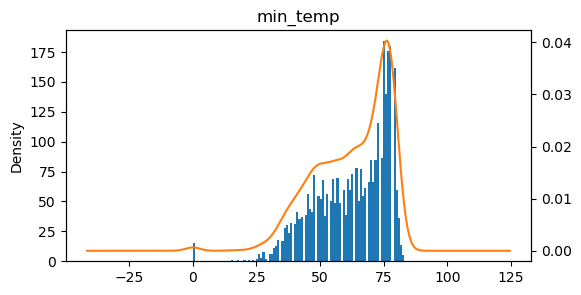

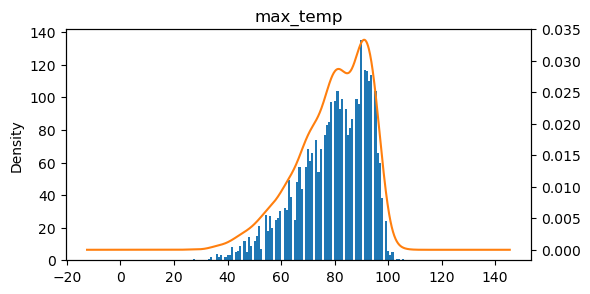

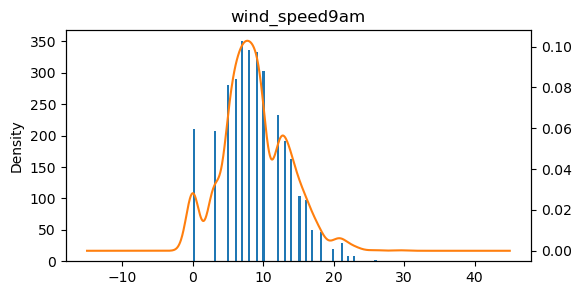

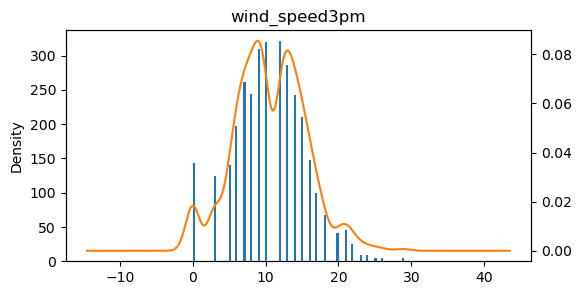

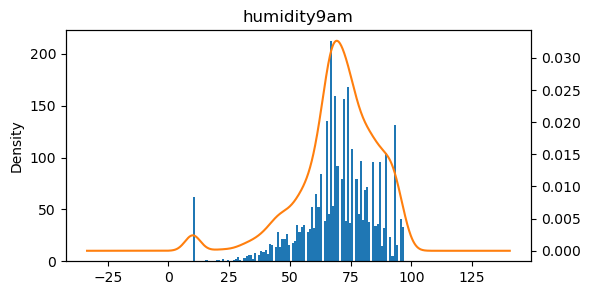

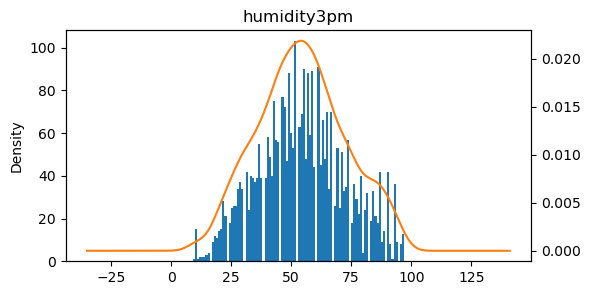

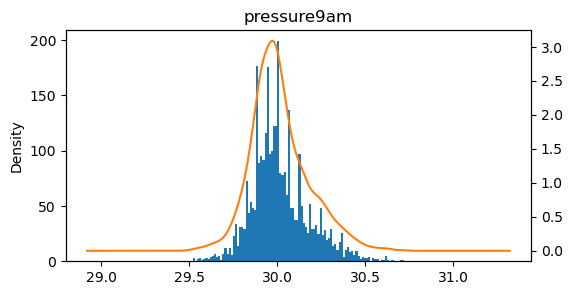

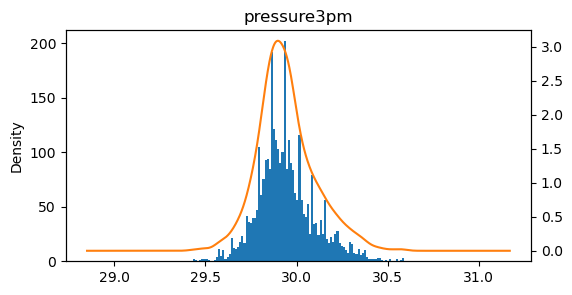

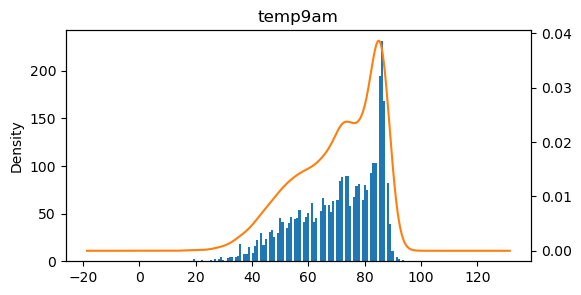

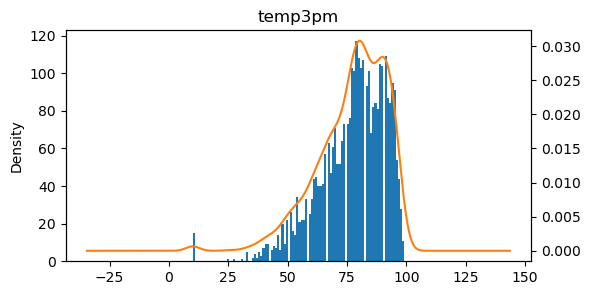

In [15]:
#Looking at the continuous data 0 data type float

num_feat = [feat for feat in df_weather.columns if df_weather[feat].dtype == 'float64']

#removing rainfall since it is a dependent feature
num_feat.remove('rainfall')


#Plotting Continuous Data - historgrams with kde plots

for feat in num_feat:
    #plt.hist(df_weather[feat], density=False, bins=100)
    plt.figure(figsize=(6,3))
    ax = df_weather[feat].plot(kind='hist', bins=100)
    df_weather[feat].plot(kind='kde', ax=ax, secondary_y=True)
    plt.title(feat)
    plt.show()


The features with plots that are left skewed are: min_temp, max_temp, humidity9am, temp9am and temp3pm. The features that look closer to a normal distribution are: wind_speed9am, humidity3pm, pressure9am and pressure3pm. One plot has a bimodal distribution (two normal distribution peaks) wind_speed3pm.

Surpised humidity9am looks left skewed but humidity3pm looks more normaly distributed.

['cloud9am', 'cloud3pm', 'rain_today', 'rain_tomorrow']


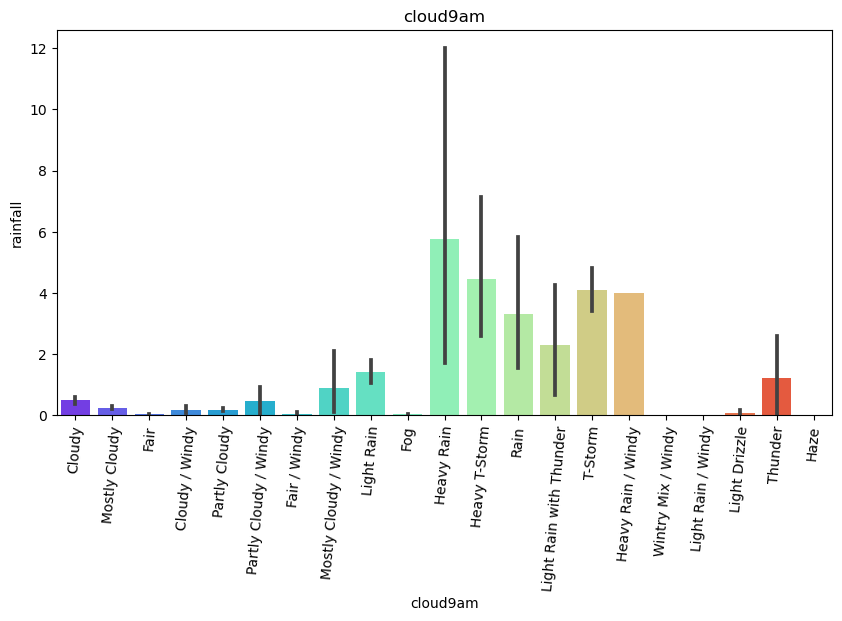

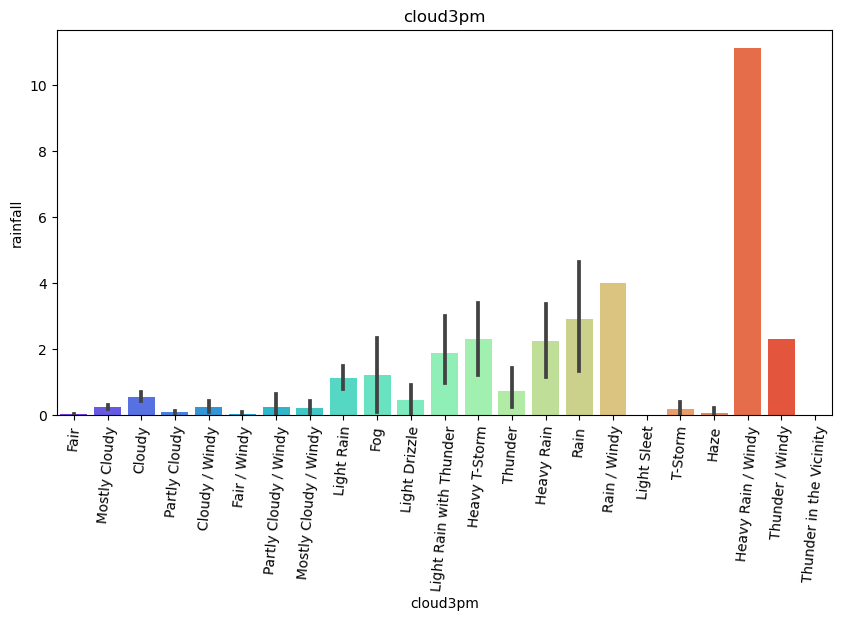

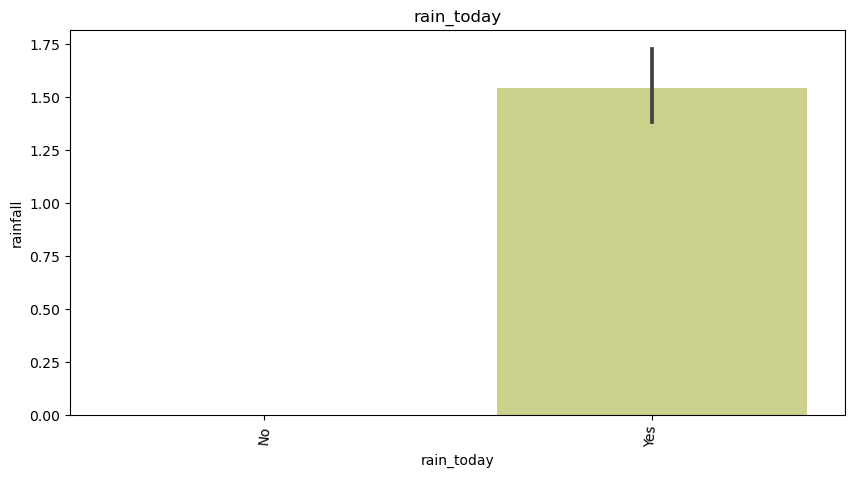

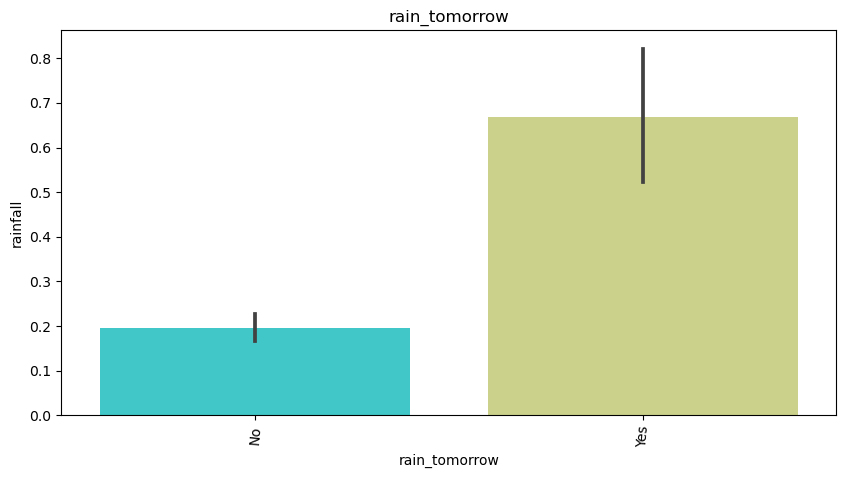

In [16]:
# Plotting categorical data
cat_col = [feat for feat in df_weather.columns if df_weather[feat].dtype == 'O']
print(cat_col)

for feat in cat_col:
    plt.figure(figsize=(10,5))
    sns.barplot(x=feat, y='rainfall',data=df_weather, palette='rainbow')
    plt.title(feat)
    plt.xticks(rotation=85)


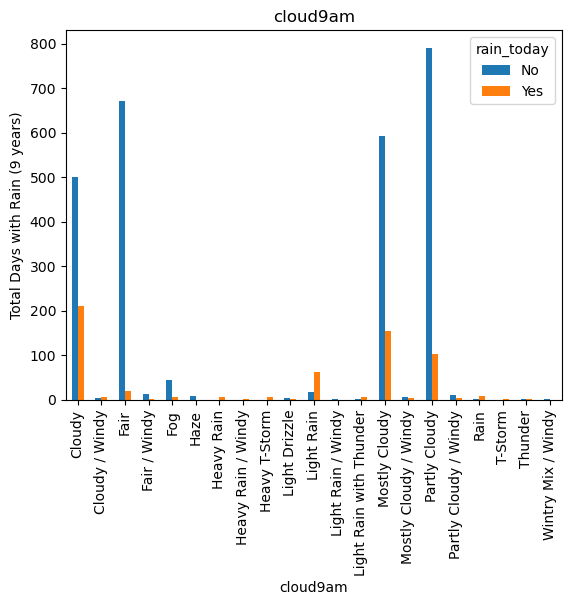

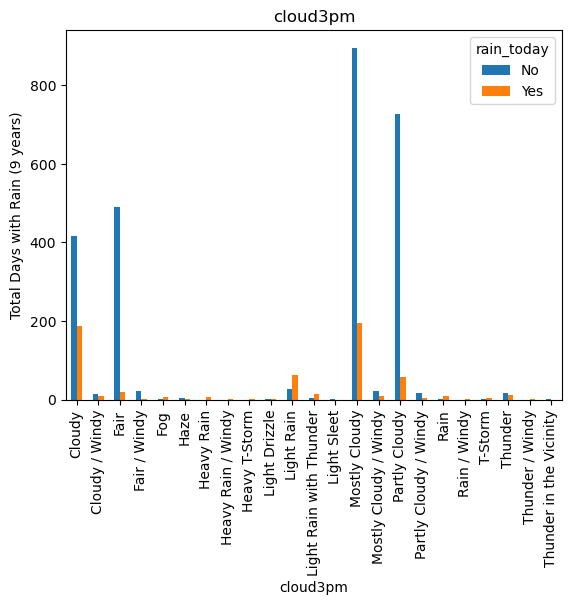

In [17]:
#compaing with rain today binary classification

cat_class = ['cloud9am', 'cloud3pm']

for feat in cat_class:
    df_weather.groupby([feat, 'rain_today']).size().unstack('rain_today').plot.bar()
    plt.title(feat)
    plt.ylabel('Total Days with Rain (9 years)')
    plt.show()


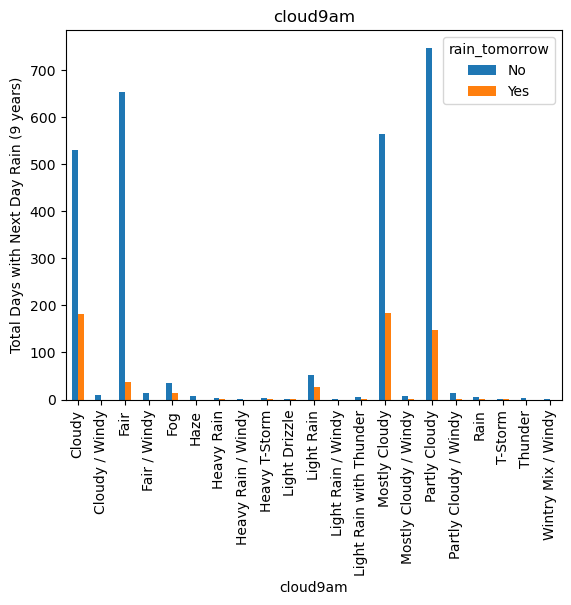

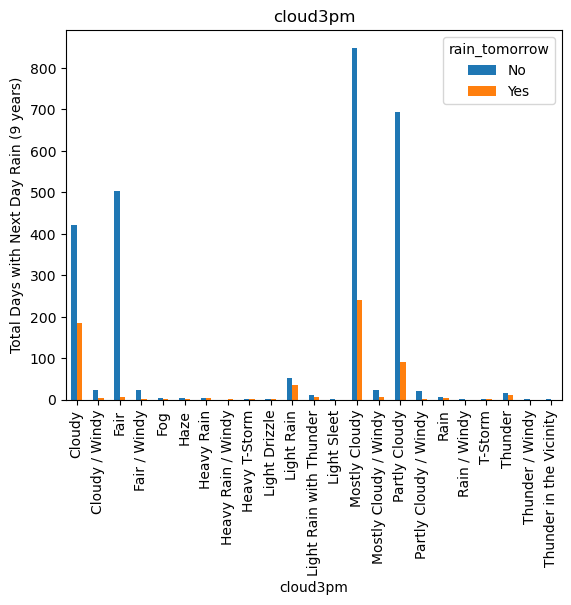

In [18]:
#compaing with rain tomorrow binary classification

cat_class = ['cloud9am', 'cloud3pm']

for feat in cat_class:
    df_weather.groupby([feat, 'rain_tomorrow']).size().unstack('rain_tomorrow').plot.bar()
    plt.title(feat)
    plt.ylabel('Total Days with Next Day Rain (9 years)')
    plt.show()


[2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019, 2021]


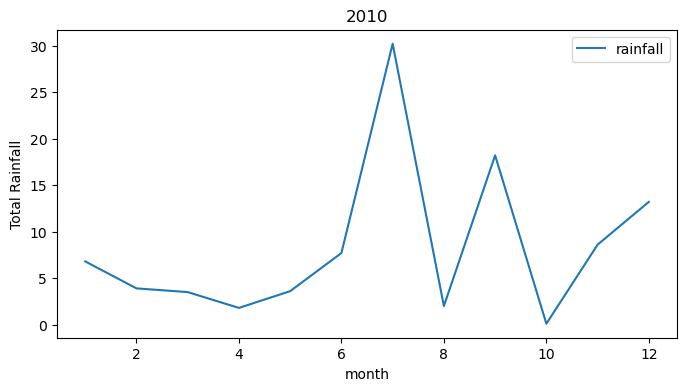

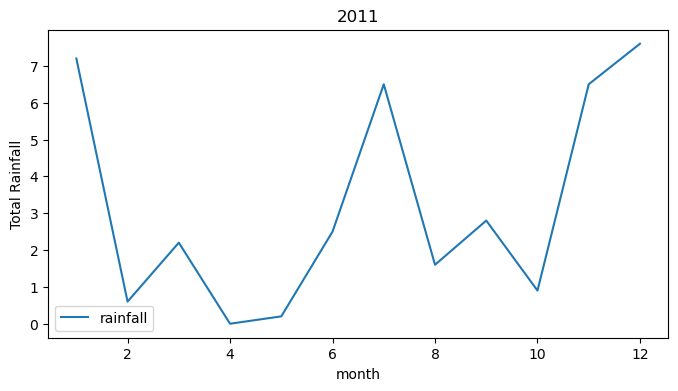

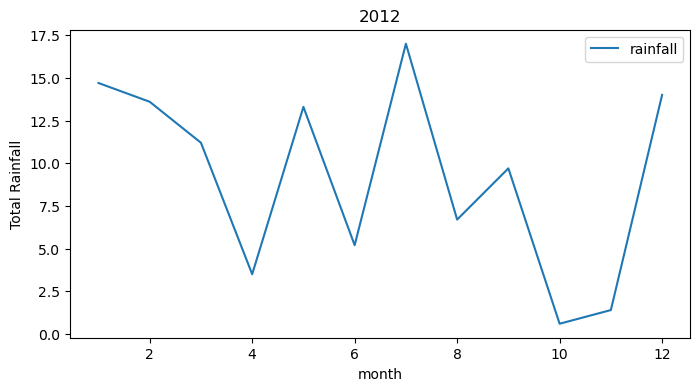

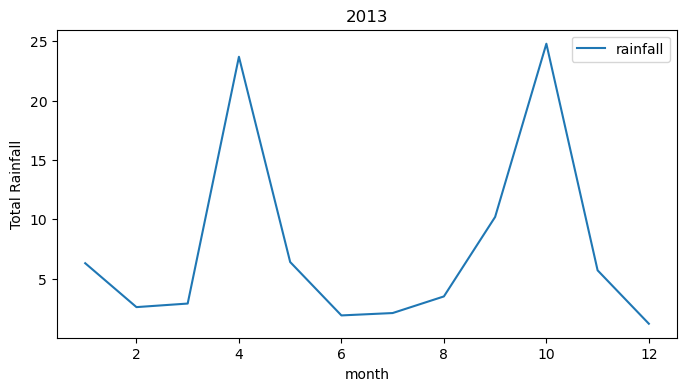

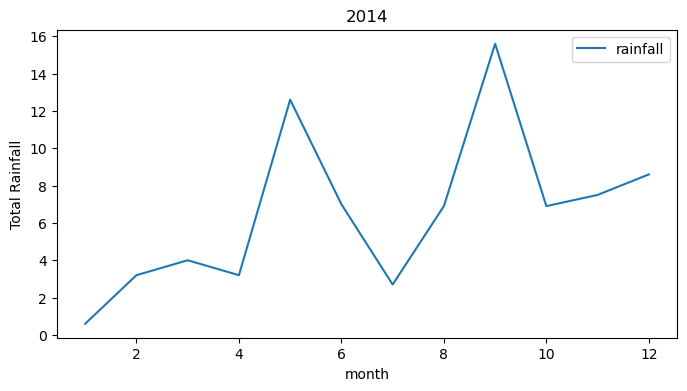

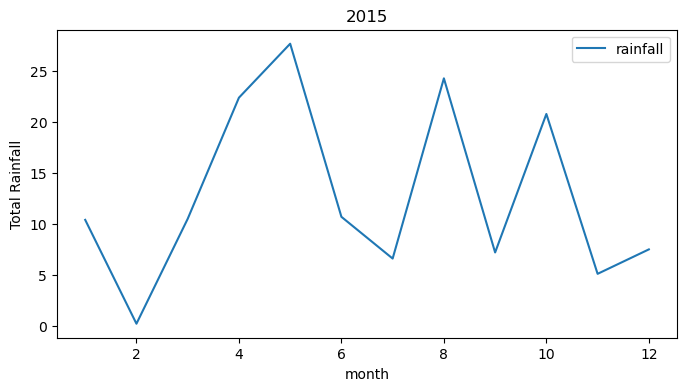

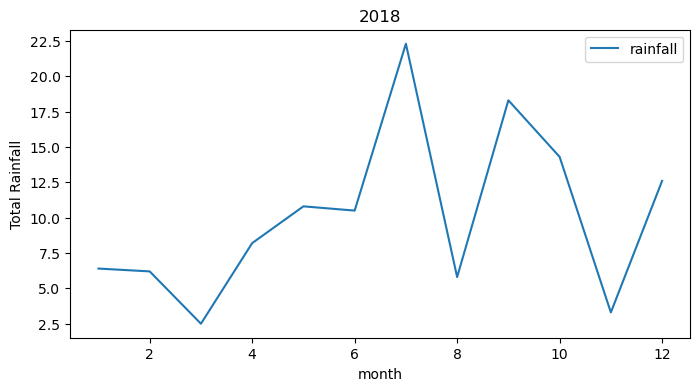

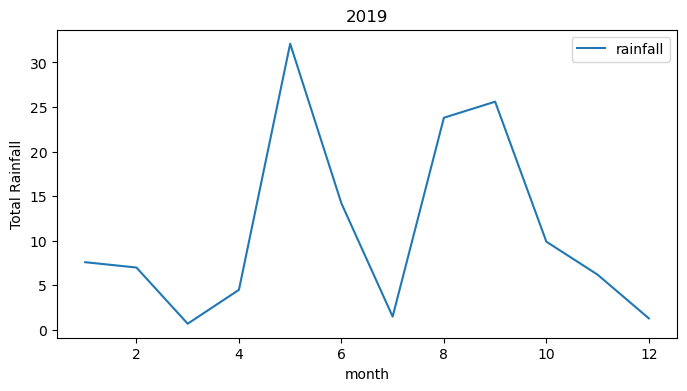

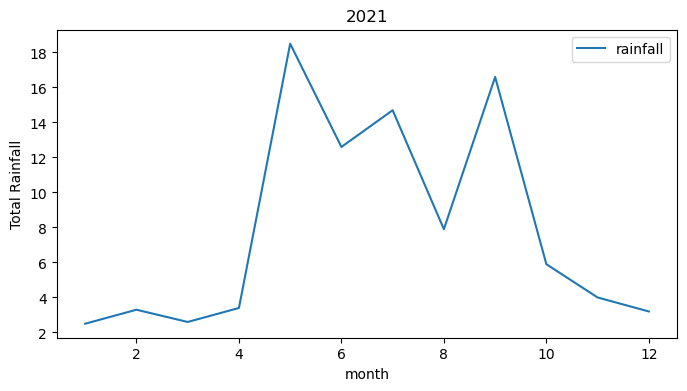

In [19]:
#list of all the years in
year_lst = df_weather.year.unique().tolist()
print(year_lst)

for year in year_lst:
    df_year = df_weather[df_weather['year']==year]
    plt.figure(figsize=(8,4))
    df_year.groupby('month')['rainfall'].sum().plot(legend=True)
    plt.title(year)
    plt.ylabel('Total Rainfall')
    plt.show()



<Figure size 800x400 with 0 Axes>

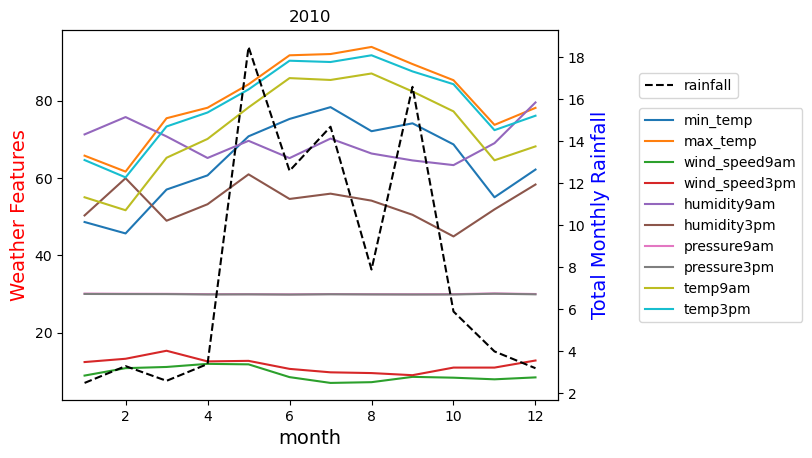

<Figure size 800x400 with 0 Axes>

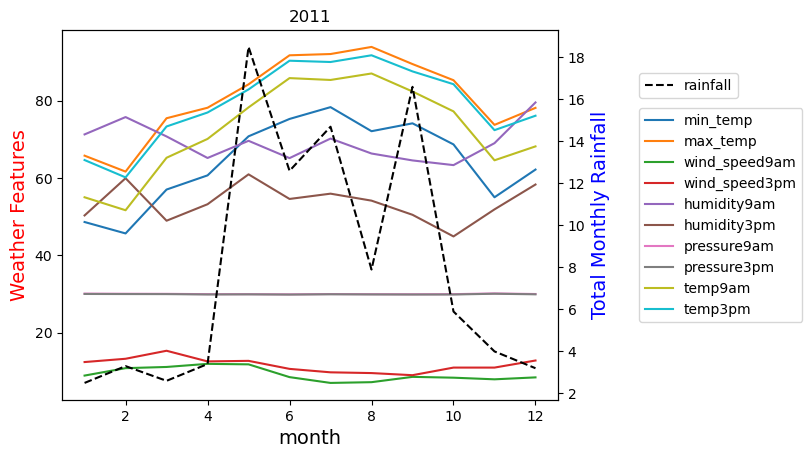

<Figure size 800x400 with 0 Axes>

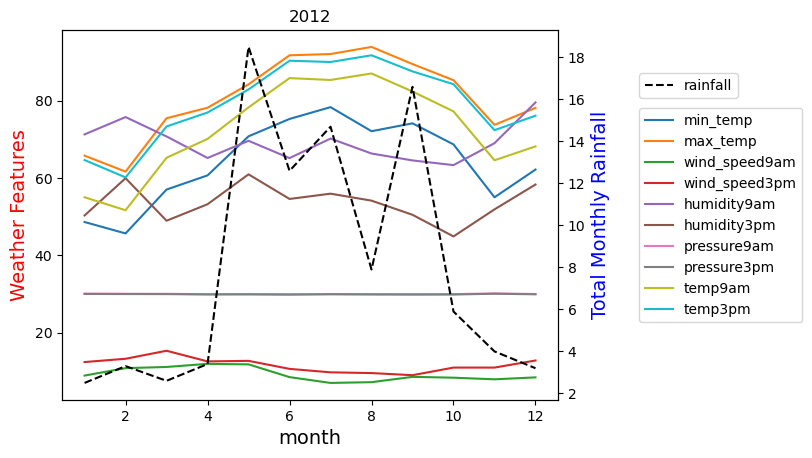

<Figure size 800x400 with 0 Axes>

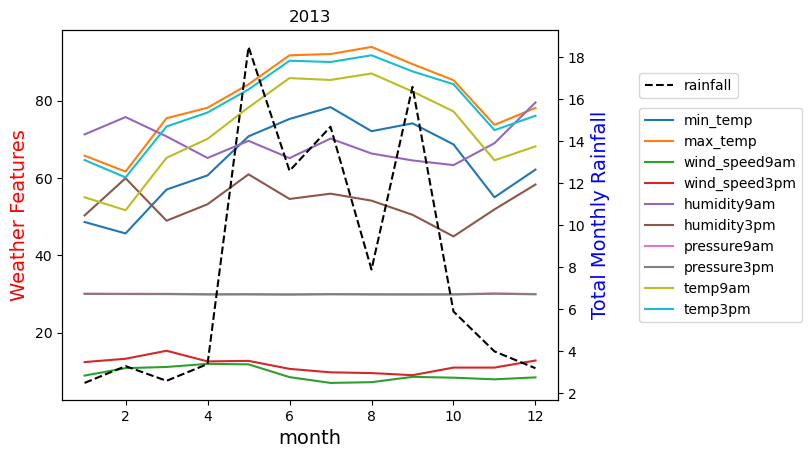

<Figure size 800x400 with 0 Axes>

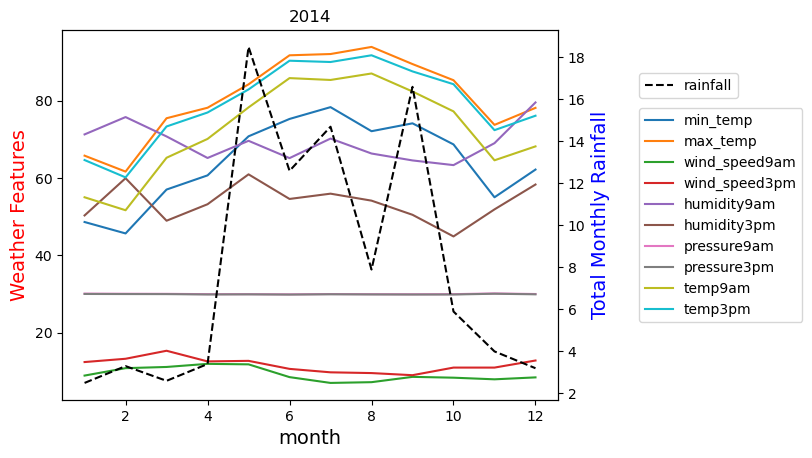

<Figure size 800x400 with 0 Axes>

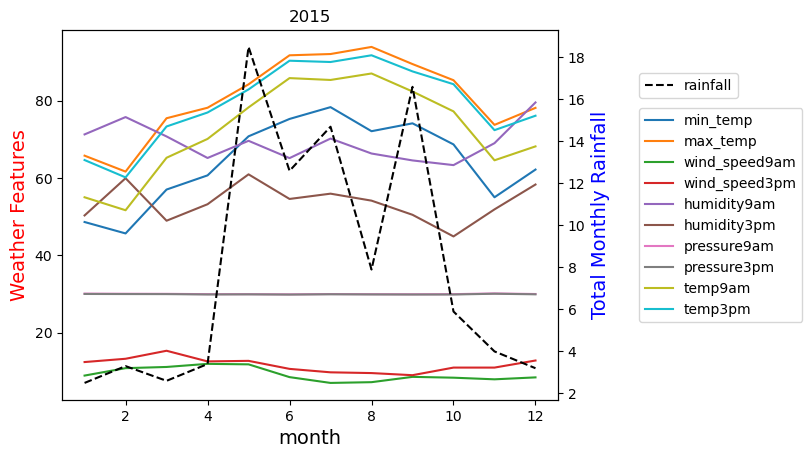

<Figure size 800x400 with 0 Axes>

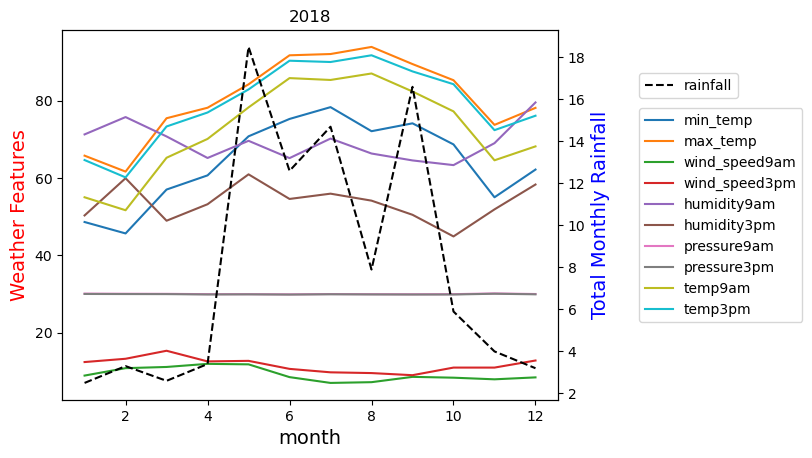

<Figure size 800x400 with 0 Axes>

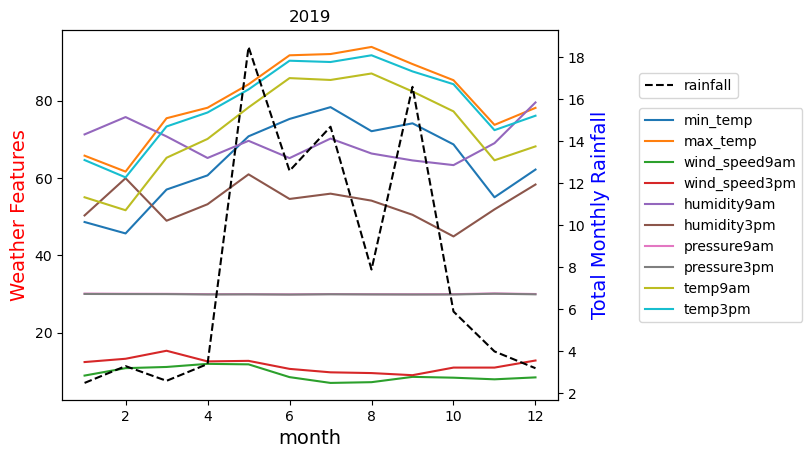

<Figure size 800x400 with 0 Axes>

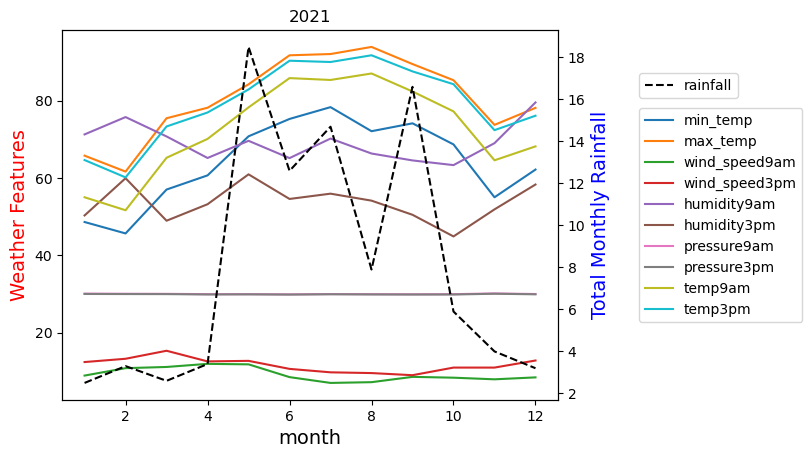

In [20]:
#Plotting by year, numeric features with total rainfall for each month

for year in year_lst:
    #fig,ax = plt.subplots()
    plt.figure(figsize=(8,4))
    ax = df_year.groupby('month')[num_feat].mean().plot(legend=True)
    ax.set_xlabel("month", fontsize = 14)
    ax.set_ylabel('Weather Features',
                  color="red",
                  fontsize=14)
    ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
    ax2 = ax.twinx()
    #ax2 = df_year.groupby('month')['rainfall'].sum().plot(legend=True, marker = 'o', color='black')
    #ax2 = df_year.groupby('month')['rainfall'].sum().plot(secondary_y=True, legend=True, color='black')
    ax2 = df_year.groupby('month')['rainfall'].sum().plot(legend=True,style='--', color='black')
    ax2.set_ylabel("Total Monthly Rainfall",color="blue",fontsize=14)
    plt.title(year)
    ax2.legend(loc='center left', bbox_to_anchor=(1.15, 0.85))
    plt.show()
    
    

In [21]:
df_weather.columns

Index(['index', 'date', 'min_temp', 'max_temp', 'rainfall', 'wind_speed9am',
       'wind_speed3pm', 'humidity9am', 'humidity3pm', 'pressure9am',
       'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm',
       'rain_today', 'rain_tomorrow', 'year', 'month', 'day'],
      dtype='object')

In [22]:
print('value count for rain tomorrow')
print(df_weather['rain_tomorrow'].value_counts())
print('percentace for rain tomorrow')
print(df_weather['rain_tomorrow'].value_counts(normalize=True)*100)
print('\n')
print('Output count difference: ', df_weather['rain_tomorrow'].value_counts()[0] - df_weather['rain_tomorrow'].value_counts()[1])

value count for rain tomorrow
No     2660
Yes     601
Name: rain_tomorrow, dtype: int64
percentace for rain tomorrow
No     81.570071
Yes    18.429929
Name: rain_tomorrow, dtype: float64


Output count difference:  2059


This a Mild degree of imbalance.


#### Handel Imbalanced Data Set

Methods:
- ML Classweight
- Under Sampling: Reduce data set so the output values are the same
    - For example if there are 100 No in a data set of 1000 reduce the nummber of Yes to 100.
    - This methods is best when the ouput balance is minimum or the data set is small
- Over Sampling
- SMOTE Tomek



#### Handling Outliers


In [23]:
df_weather.head()

,index,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow,year,month,day
0,0,2010-01-01,43.0,55.0,0.0,15.0,15.0,76.0,40.0,30.40,30.31,Cloudy,Fair,43.0,55.0,No,No,2010,1,1
1,1,2010-01-02,35.0,53.0,0.0,5.0,7.0,76.0,28.0,30.35,30.24,Mostly Cloudy,Mostly Cloudy,44.0,52.0,No,No,2010,1,2
2,2,2010-01-03,43.0,48.0,0.0,14.0,9.0,71.0,68.0,30.21,30.17,Cloudy,Cloudy,43.0,48.0,No,No,2010,1,3
3,3,2010-01-04,36.0,48.0,0.0,15.0,14.0,70.0,42.0,30.37,30.35,Cloudy,Fair,41.0,48.0,No,No,2010,1,4
4,4,2010-01-05,30.0,49.0,0.0,9.0,5.0,61.0,37.0,30.47,30.34,Fair,Partly Cloudy,35.0,48.0,No,No,2010,1,5


In [24]:
#All numeric features

num_feat = [feat for feat in df_weather.columns if df_weather[feat].dtype == 'float64']

#droping rainfall since it is a dependent feature
num_feat.remove('rainfall')

num_feat

['min_temp',
 'max_temp',
 'wind_speed9am',
 'wind_speed3pm',
 'humidity9am',
 'humidity3pm',
 'pressure9am',
 'pressure3pm',
 'temp9am',
 'temp3pm']

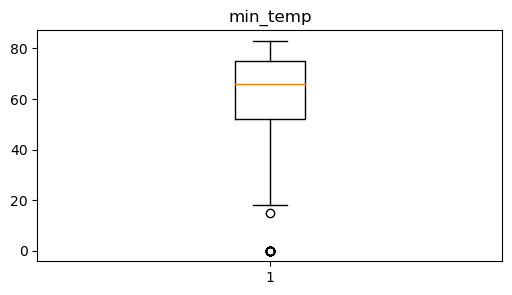

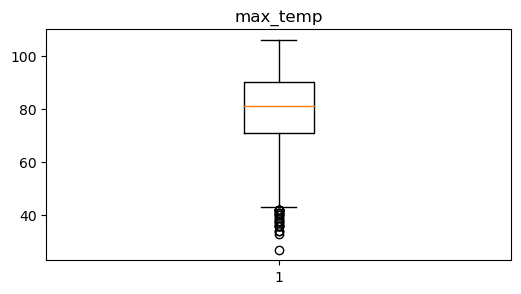

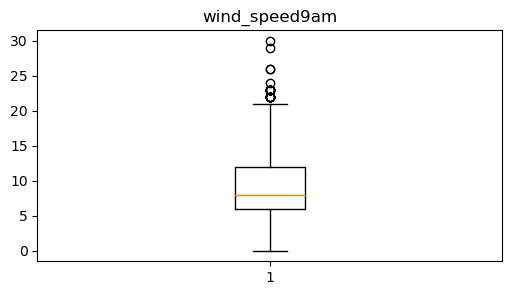

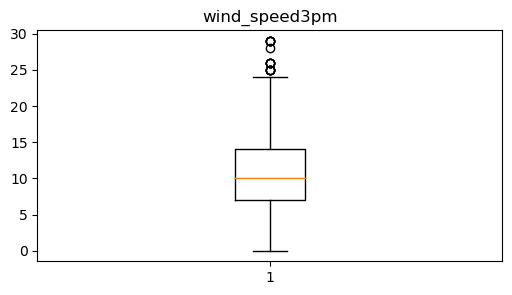

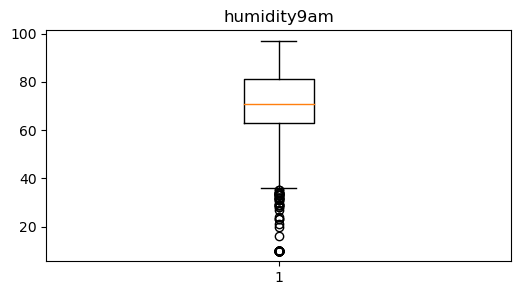

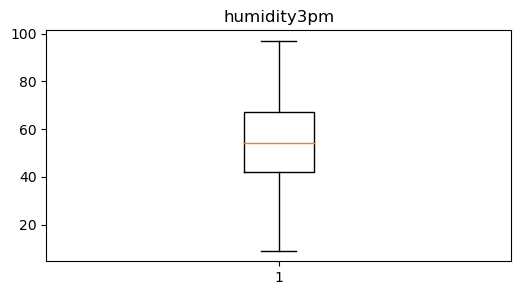

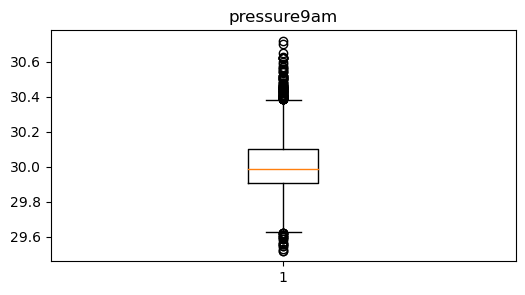

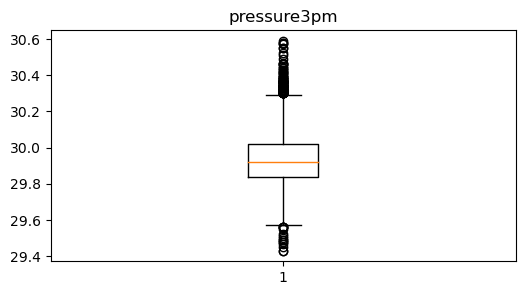

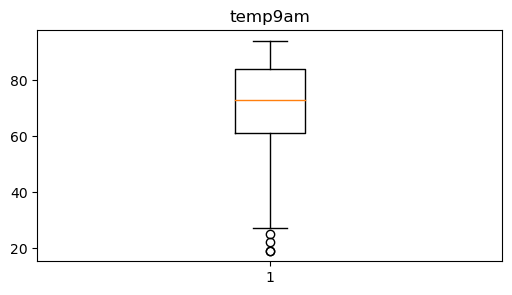

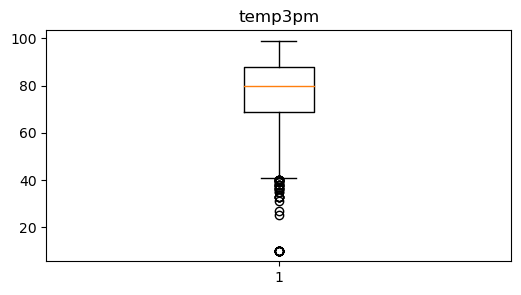

In [25]:
#Box plot to look at what numeric features have outliers

for feat in num_feat:
    plt.figure(figsize=(6,3))
    plt.boxplot(df_weather[feat])
    plt.title(feat)
    plt.show()

In [26]:

df_weather[num_feat].describe()


,min_temp,max_temp,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm
count,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000,3261.000000
mean,62.716651,79.444956,8.822447,10.602883,70.144128,54.489114,30.014287,29.942536,70.763876,77.287948
std,14.367420,13.121137,4.617525,4.893928,15.969836,18.305643,0.164000,0.158007,14.304920,14.194666
min,0.000000,27.000000,0.000000,0.000000,10.000000,9.000000,29.520000,29.430000,19.000000,10.000000
25%,52.000000,71.000000,6.000000,7.000000,63.000000,42.000000,29.910000,29.840000,61.000000,69.000000
50%,66.000000,81.000000,8.000000,10.000000,71.000000,54.000000,29.990000,29.920000,73.000000,80.000000
75%,75.000000,90.000000,12.000000,14.000000,81.000000,67.000000,30.100000,30.020000,84.000000,88.000000
max,83.000000,106.000000,30.000000,29.000000,97.000000,97.000000,30.720000,30.590000,94.000000,99.000000


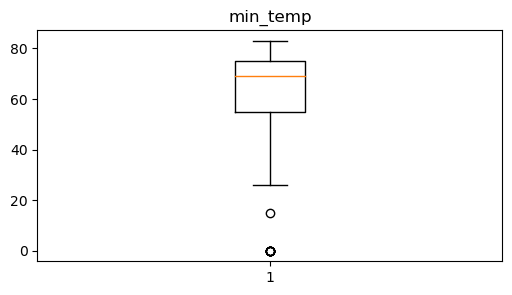

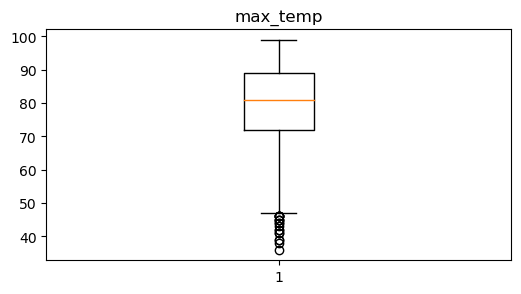

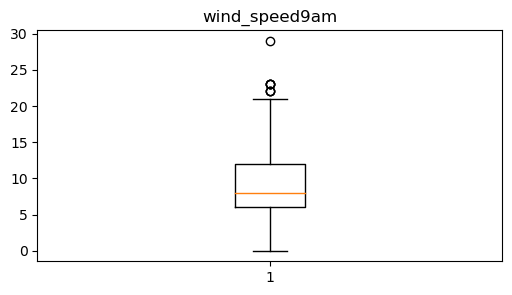

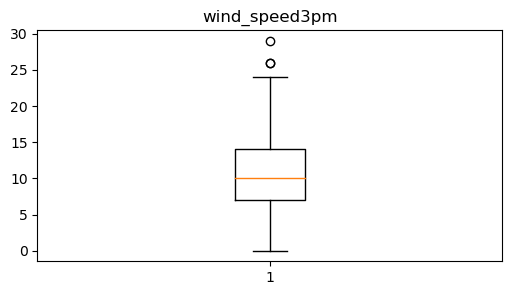

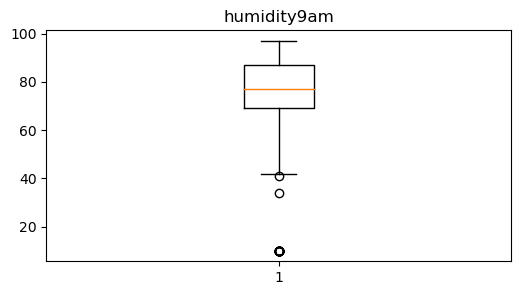

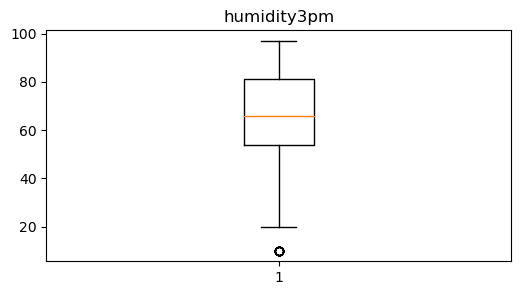

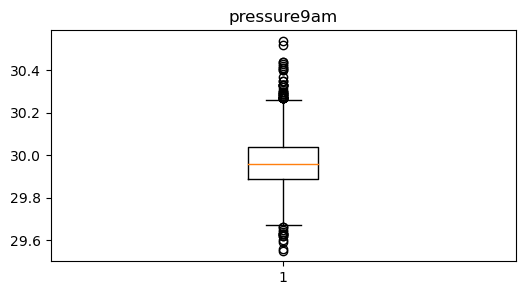

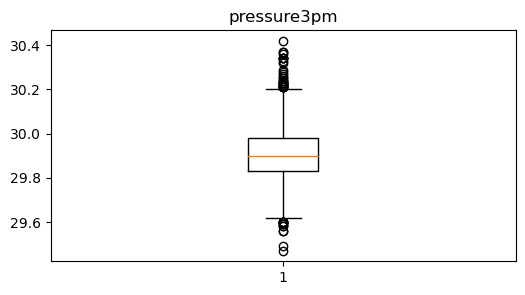

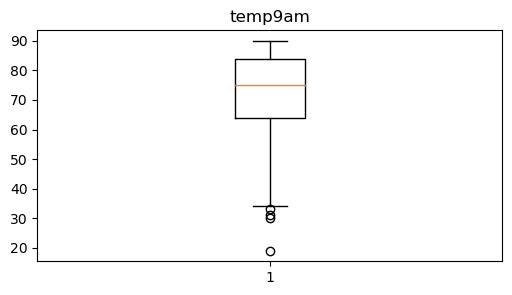

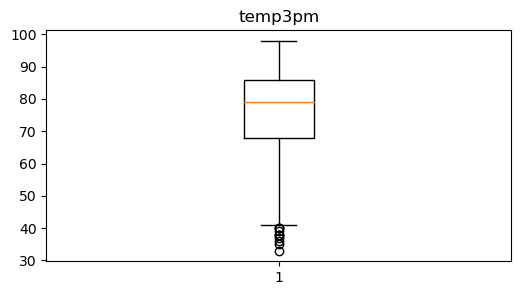

In [27]:
#data frame with just the days it rained or will rain the next day
df_rain = df_weather[(df_weather['rain_today']=='Yes') | (df_weather['rain_tomorrow']=='Yes')]

#Box plot to look at what numeric features have outliers
for feat in num_feat:
    plt.figure(figsize=(6,3))
    plt.boxplot(df_rain[feat])
    plt.title(feat)
    plt.show()

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


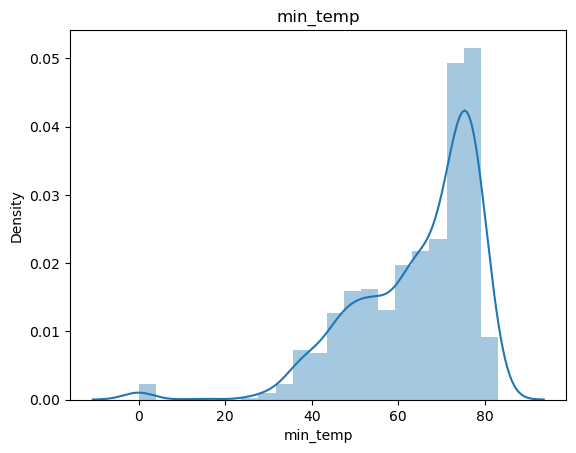

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


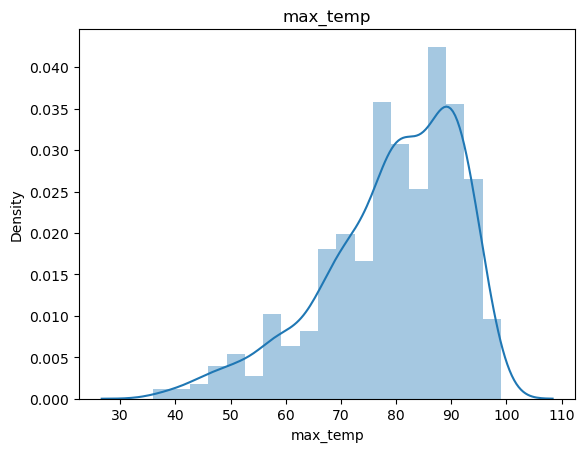

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


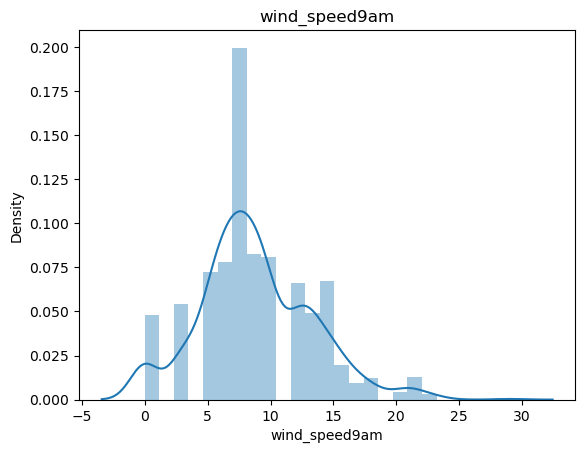

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


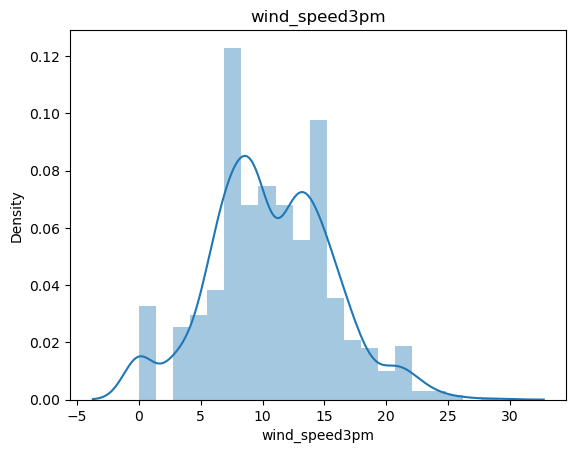

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


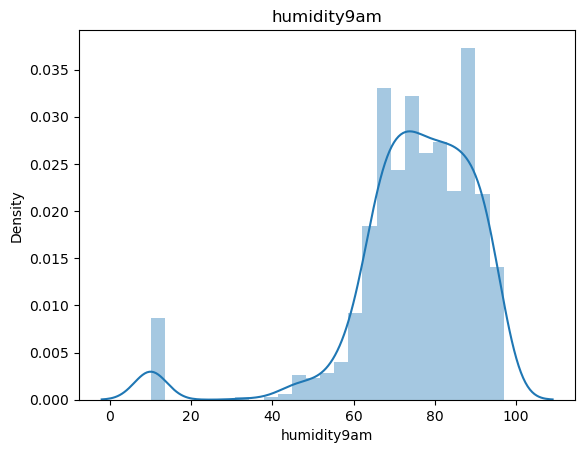

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


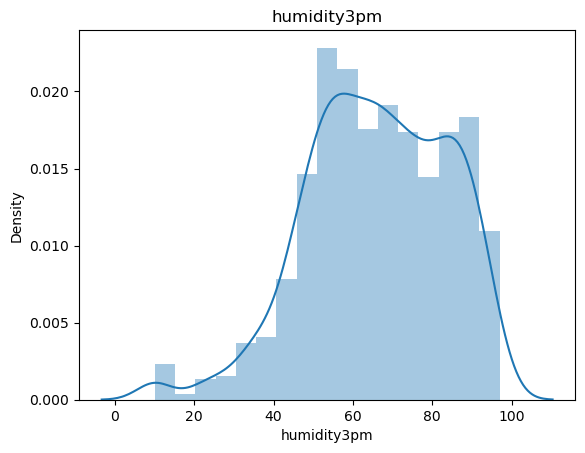

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


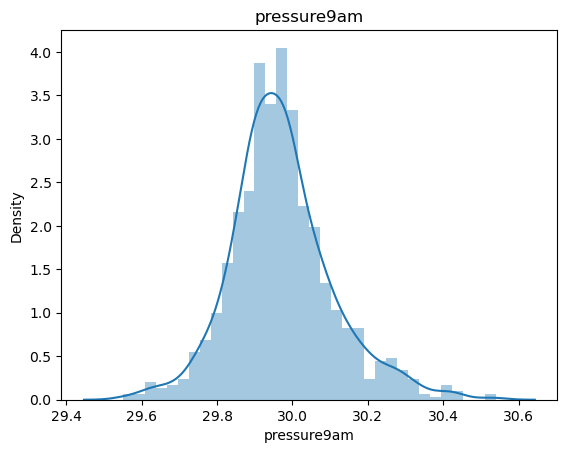

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


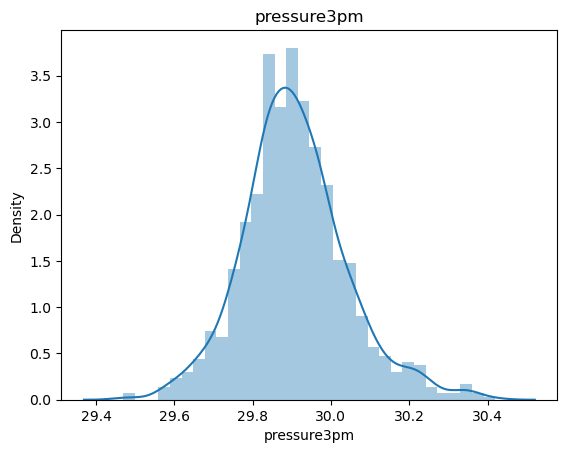

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


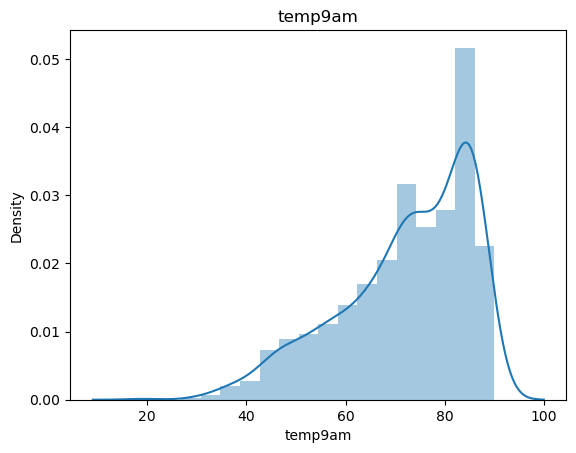

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_2026/2275543767.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain[feat])


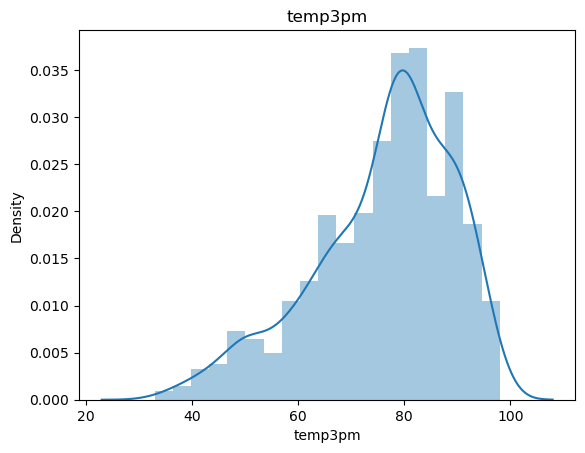

In [28]:
#Looking at the Gaussian Deistribution with just the rain data frame

for feat in num_feat:
    sns.distplot(df_rain[feat])
    plt.title(feat)
    plt.show()

#### Handeling Outliers

Looking at the outliers the values do not appear to be a sample issue. The values do not appear to be a misprint or due to a data collection error. Since the rows with rain or next day rain have outliners as well, it is hard to tell if the outliers are critical to dependent feature of rain. Below are methods for handeling outliers to try and improve the model later.

Methods for handeling outliers
- Outliers when the data is Normal/Gaussian Distributed
    - Upper and Lower Boundary
    - Upper and Lower Bridge
    - Typically replace outliers with Upper and Lower Boundary
- Outliers when the data is NOT Normal/Gaussian Distributed
    - Upper and Lower Boundary
    - Extreme Upper and Lower Bridge
    - Typically replace outliers with Extreme Upper and Lower Bridge

In [29]:
#Looking at the categorical features

cat_feat = [feat for feat in df_weather.columns if df_weather[feat].dtype == 'O']
#droping 'rain_today' and 'rain_tomorrow' since they are the dependent features
cat_feat.remove('rain_today')
cat_feat.remove('rain_tomorrow')
cat_feat

['cloud9am', 'cloud3pm']

In [30]:
print(df_weather['cloud9am'].value_counts())

Partly Cloudy              894
Mostly Cloudy              747
Cloudy                     711
Fair                       690
Light Rain                  78
Fog                         48
Partly Cloudy / Windy       15
Fair / Windy                14
Cloudy / Windy              10
Mostly Cloudy / Windy        9
Rain                         8
Haze                         8
Heavy T-Storm                6
Light Rain with Thunder      6
Heavy Rain                   5
Light Drizzle                4
Thunder                      3
T-Storm                      2
Heavy Rain / Windy           1
Wintry Mix / Windy           1
Light Rain / Windy           1
Name: cloud9am, dtype: int64


The categorical data for cloud9am and cloud3pm is both nominal (fog, rain, windy, ect.) and ordinal (light dirzzel, rain, heavy T-storm). So spliting the nominal categories in to different features and filling with the ordinal categories.

Listing in order of severity, to later assign numeric rank

Wind: Fair / Windy, Partly Cloudy / Windy, Mostly Cloudy / Windy, Cloudy / Windy

Rain: Thunder in the Vicinity, Light Drizzle, Light Rain, Light Rain with Thunder, Light Sleet, Rain,  Thunder, Heavy Rain, T-Storm, Heavy T-Storm

Rain_Wind: Rain / Windy, Heavy Rain / Windy, Thunder / Windy

Other: Fair, Mostly Cloudy, Partly Cloudy, Cloudy, Fog, Haze


In [31]:
#Mapping numeric value to categorical value - wind
# All nan values filled in with 0

wind_map = {'Fair / Windy':1, 'Partly Cloudy / Windy':2, 
            'Mostly Cloudy / Windy':3, 'Cloudy / Windy':4}
df_weather['wind_9am'] = df_weather['cloud9am'].map(wind_map)
df_weather['wind_3pm'] = df_weather['cloud3pm'].map(wind_map)

df_weather[['wind_9am','cloud9am', 'wind_3pm','cloud3pm']].head(10)

,wind_9am,cloud9am,wind_3pm,cloud3pm
0,NaN,Cloudy,NaN,Fair
1,NaN,Mostly Cloudy,NaN,Mostly Cloudy
2,NaN,Cloudy,NaN,Cloudy
3,NaN,Cloudy,NaN,Fair
4,NaN,Fair,NaN,Partly Cloudy
5,NaN,Cloudy,NaN,Cloudy
6,4.0,Cloudy / Windy,4.0,Cloudy / Windy
7,NaN,Cloudy,NaN,Cloudy
8,NaN,Fair,NaN,Fair
9,NaN,Fair,NaN,Fair


In [32]:
# Mapping numeric value to categorical value - rain
# All nan values filled in with 0

rain_map = {'Thunder in the Vicinity':1, 'Light Drizzle':2, 'Light Rain':3, 
            'Light Rain with Thunder':4, 'Light Sleet':5, 'Rain':6, 'Thunder':7, 
            'Heavy Rain':8, 'T-Storm':9, 'Heavy T-Storm':10}
df_weather['rain_9am'] = df_weather['cloud9am'].map(rain_map)
df_weather['rain_3pm'] = df_weather['cloud3pm'].map(rain_map)

df_weather[['rain_9am','cloud9am', 'rain_3pm','cloud3pm', 'rain_today']][df_weather['rain_today']=='Yes'].tail()

,rain_9am,cloud9am,rain_3pm,cloud3pm,rain_today
3221,NaN,Partly Cloudy,NaN,Mostly Cloudy,Yes
3225,6.0,Rain,3.0,Light Rain,Yes
3227,NaN,Mostly Cloudy,NaN,Cloudy,Yes
3236,NaN,Mostly Cloudy,NaN,Mostly Cloudy,Yes
3248,NaN,Mostly Cloudy,4.0,Light Rain with Thunder,Yes


In [33]:
# Mapping numeric value to categorical value - rain
# All nan values filled in with 0

rain_wind_map = {'Rain / Windy':1, 'Heavy Rain / Windy':2, 'Thunder / Windy':3}
df_weather['rain_wind_9am'] = df_weather['cloud9am'].map(rain_wind_map)
df_weather['rain_wind_3pm'] = df_weather['cloud3pm'].map(rain_wind_map)

df_weather[['rain_wind_9am','cloud9am', 'rain_wind_3pm','cloud3pm', 'rain_today']][df_weather['cloud3pm']=='Rain / Windy']

,rain_wind_9am,cloud9am,rain_wind_3pm,cloud3pm,rain_today
2104,2.0,Heavy Rain / Windy,1.0,Rain / Windy,Yes


In [34]:
# Mapping numeric value to categorical value - rain
# All nan values filled in with 0

other_map = {'Fair':1, 'Mostly Cloudy':2, 'Partly Cloudy':3, 'Cloudy':4, 'Fog':5, 'Haze':6}
df_weather['weather_other_9am'] = df_weather['cloud9am'].map(other_map)
df_weather['weather_other_3pm'] = df_weather['cloud3pm'].map(other_map)

df_weather[['weather_other_9am','cloud9am', 'weather_other_3pm','cloud3pm']].head()

,weather_other_9am,cloud9am,weather_other_3pm,cloud3pm
0,4.0,Cloudy,1.0,Fair
1,2.0,Mostly Cloudy,2.0,Mostly Cloudy
2,4.0,Cloudy,4.0,Cloudy
3,4.0,Cloudy,1.0,Fair
4,1.0,Fair,3.0,Partly Cloudy


In [35]:
df_weather.isna().sum()

index                   0
date                    0
min_temp                0
max_temp                0
rainfall                0
wind_speed9am           0
wind_speed3pm           0
humidity9am             0
humidity3pm             0
pressure9am             0
pressure3pm             0
cloud9am                0
cloud3pm                0
temp9am                 0
temp3pm                 0
rain_today              0
rain_tomorrow           0
year                    0
month                   0
day                     0
wind_9am             3213
wind_3pm             3161
rain_9am             3149
rain_3pm             3103
rain_wind_9am        3260
rain_wind_3pm        3258
weather_other_9am     163
weather_other_3pm     261
dtype: int64

In [36]:
# Filling all na values in new features generated off the categorical data
#These are all the values not filled in by the mapping performed above
df_weather.fillna(0, inplace=True)

#drop the categorical columns since they have been replaced as new features
df_weather.drop(cat_feat, axis=1, inplace=True)

df_weather.isna().sum()

index                0
date                 0
min_temp             0
max_temp             0
rainfall             0
wind_speed9am        0
wind_speed3pm        0
humidity9am          0
humidity3pm          0
pressure9am          0
pressure3pm          0
temp9am              0
temp3pm              0
rain_today           0
rain_tomorrow        0
year                 0
month                0
day                  0
wind_9am             0
wind_3pm             0
rain_9am             0
rain_3pm             0
rain_wind_9am        0
rain_wind_3pm        0
weather_other_9am    0
weather_other_3pm    0
dtype: int64

In [37]:
# Export cleanded data as CSV file
#df_weather.to_csv(data_file_path+'weather_data_clean.csv',index=False)